In [22]:
import torch
tensor = torch.load('train_esm.pt')
print(tensor)
embed=tensor["data"]
print(embed.shape)

{'data': tensor([[ 0.0224,  0.0143, -0.0020,  ..., -0.0495, -0.1222, -0.0426],
        [ 0.0247,  0.0146,  0.0007,  ..., -0.0586, -0.1254, -0.0454],
        [ 0.0040, -0.0263, -0.0179,  ..., -0.0267, -0.1128, -0.0810],
        ...,
        [ 0.0121, -0.0161,  0.0114,  ..., -0.0207, -0.1261, -0.0674],
        [ 0.0416,  0.0167,  0.0156,  ..., -0.0460, -0.1191, -0.0480],
        [ 0.0365, -0.0047,  0.0034,  ..., -0.0487, -0.1371, -0.0620]]), 'proteins': ['407', '4011', 'L6', '3061', 'L141', 'CD7', 'CE8', '3B11', '4B1', 'B9', 'L1', 'L19', 'L24', 'P13', 'L39', 'L77', 'L149', 'L168', '4081', 'L28', 'L150', 'CE10', 'P10', 'L61', 'L170', 'CB6', 'CE7', '203', 'P1', 'P3', 'L15', 'L116', 'L133', 'L174', 'TfR_1', 'TfR_2', 'P6', 'n501', 'L2', 'L7', 'L16', 'L88', 'L91', 'L93', 'L175', 'P4', 'P5', 'P11', 'P18', 'P19', 'P20', 'P21', 'C8', 'R5', 'L14', 'L23', 'L45', 'L70', 'L143', 'L151', 'L177', 'HSA_5', '301', 'P2', 'P15', 'L20', 'L25', 'L32', 'L37', 'L57', 'L72', 'L86', 'L136', 'L142', 'L147', 'L14

In [23]:
import pandas as pd
from pandas import read_csv
data=read_csv('../Yinglab_Protein_Data/UDAB_production_20240521.csv')
#取出production_classify列，如果是A就是1，如果是B就是0
label = data['production_classify'].map({'A': 1, 'B': 0})

In [24]:
all_data = torch.load('train_esm.pt')["data"]
all_label=label
#把label转换成tensor
all_label = torch.tensor(all_label.values, dtype=torch.long)
print(all_data.shape)
print(all_data.type())
print(all_label.shape)
print(all_label.type())

torch.Size([105, 2560])
torch.FloatTensor
torch.Size([105])
torch.LongTensor


In [25]:
#将数据集分为训练集和测试集
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label, test_size=0.05, random_state=0)

Epoch [1/15], Loss: 0.6942394375801086
Epoch [2/15], Loss: 0.6905669569969177
Epoch [3/15], Loss: 0.6878826022148132


Epoch [4/15], Loss: 0.6856376528739929
Epoch [5/15], Loss: 0.6837663054466248
Epoch [6/15], Loss: 0.6822030544281006
Epoch [7/15], Loss: 0.6808946132659912
Epoch [8/15], Loss: 0.6797977685928345
Epoch [9/15], Loss: 0.6789182424545288
Epoch [10/15], Loss: 0.6782863736152649
Epoch [11/15], Loss: 0.6779224872589111
Epoch [12/15], Loss: 0.6778190732002258
Epoch [13/15], Loss: 0.677920937538147
Epoch [14/15], Loss: 0.6781055927276611
Epoch [15/15], Loss: 0.6782318949699402


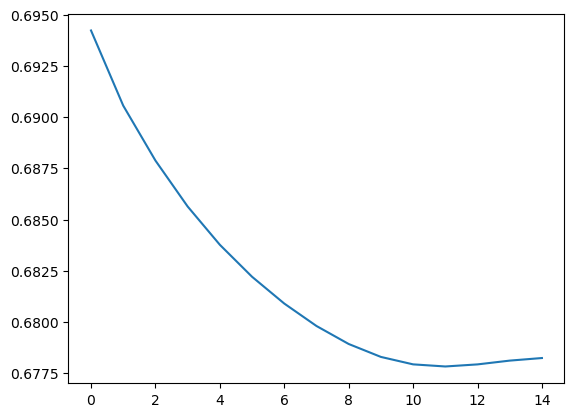

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2,hidden_size_3,output_size):
        super(MLP, self).__init__()
        self.hidden_1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.hidden_2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.hidden_3 = nn.Linear(hidden_size_2, hidden_size_3)
        self.output = nn.Linear(hidden_size_3, output_size)
        
    def forward(self, x):
        x = self.hidden_1(x)
        x = self.relu(x)
        x = self.hidden_2(x)
        x = self.relu(x)
        x = self.hidden_3(x)
        x = self.relu(x)
        x = self.output(x)
        return x

input_size = 2560
hidden_size_1 = 1120
hidden_size_2 = 560
hidden_size_3 = 280
output_size = 2
model = MLP(input_size, hidden_size_1,hidden_size_2, hidden_size_3,output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

input_data = train_data
target_data = train_label

num_epochs = 15
losslist = []
for epoch in range(num_epochs):
    output = model(input_data)
    loss = criterion(output, target_data)
    losslist.append(loss.item())
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
#画图，横坐标是epoch，纵坐标是loss
import matplotlib.pyplot as plt
plt.plot(losslist)


# 测试模型
test_input = test_data
with torch.no_grad():
    output = model(test_input)
    predicted_classes = torch.argmax(output, dim=1)
    # 计算准确率
    accuracy = (predicted_classes == test_label).sum() / test_label.size(0) 


In [27]:
# 测试模型
test_input = test_data
with torch.no_grad():
    output = model(test_input)
    predicted_classes = torch.argmax(output, dim=1)
    # 计算准确率
accuracy = (predicted_classes == test_label).sum() / test_label.size(0)
print(test_label.size(0))
print(f"the correction rate is: {accuracy:.2%}")

6
the correction rate is: 66.67%
